In [1]:
import numpy as np

# Given array and desired normalization range
CONS_RANK = [12, 11, 10, 9, 9, 8, 7, 6, 5, 5, 3, 2]
min_range = -0.95
max_range = 0.95

# Find the minimum and maximum values in the original array
min_original = min(CONS_RANK)
max_original = max(CONS_RANK)

# Normalize the array
normalized_values = np.array([
    min_range + (value - min_original) / (max_original - min_original) * (max_range - min_range)
    for value in CONS_RANK
])

mean_normalized = np.sum(normalized_values) / normalized_values.size

# Adjust the normalized values to have a sum of 0
zero_sum_values = np.array([value - mean_normalized for value in normalized_values])

zero_sum_values, sum(zero_sum_values)


(array([ 0.9025,  0.7125,  0.5225,  0.3325,  0.3325,  0.1425, -0.0475,
        -0.2375, -0.4275, -0.4275, -0.8075, -0.9975]),
 4.440892098500626e-16)

In [2]:
from analysis.musical import consonance_ordered_notes, consonance_probabilities

root_note = "C4"
consonance_ordered_notes(root_note)


['C5', 'G4', 'F4', 'E4', 'A4', 'G#4', 'D#4', 'F#4', 'A#4', 'D4', 'B4', 'C#4']

In [3]:
# scores = consonance_scores(min_value=0.01, max_value=0.99, dont_adjust=True)
scores = consonance_probabilities()
scores

[0.14666666666666667,
 0.13333333333333333,
 0.12,
 0.10666666666666667,
 0.10666666666666667,
 0.09333333333333334,
 0.08,
 0.06666666666666667,
 0.05333333333333334,
 0.05333333333333334,
 0.02666666666666667,
 0.013333333333333334]

In [4]:
from model import get_spikes
import numpy as np
from analysis.spike_tensor import generate_expectation, generate_spike_tensor

spikes_list = [get_spikes(note) for note in consonance_ordered_notes(root_note)]
spike_tensors = [generate_spike_tensor(spikes) for spikes in spikes_list]
expectation = generate_expectation(spike_tensors, consonance_probabilities())

[0.12351527404898786, 0.12641414465338222, 0.12448206336104593, 0.12585939904575968, 0.12781150884748954, 0.1310300142077655, 0.12639540790568626, 0.12625515607996618, 0.12746485847889213, 0.12537138323896727, 0.1250587149078171]


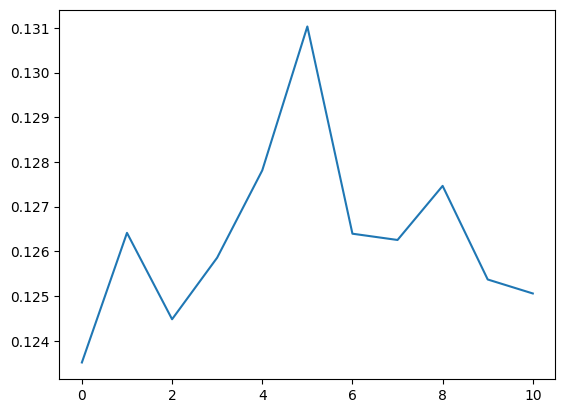

In [5]:
from model import get_spikes
from analysis.spike_tensor import generate_snapshot
import matplotlib.pyplot as plt


spikes = get_spikes(root_note)
tensor = generate_spike_tensor(spikes)
snapshot = generate_snapshot(tensor, expectation, snap_size=11)
print(snapshot)
plt.plot(snapshot)

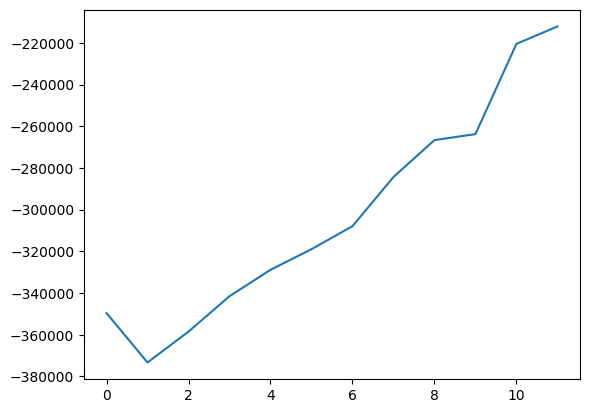

In [6]:
for tensor in spike_tensors:
    tension = - np.sum(tensor * expectation)
tension = [-np.sum(tensor * expectation) for tensor in spike_tensors]

import matplotlib.pyplot as plt
plt.plot(tension)

[-0.04796889753002971, -0.08037022769046367, -0.06430299965078487, -0.04481524184381622, -0.013570966961001506, -0.9400405359290314, -0.012814888410884996, -0.0446473073328414, -0.06762339832329646, -0.07814153091363006, -0.04911767552254386]


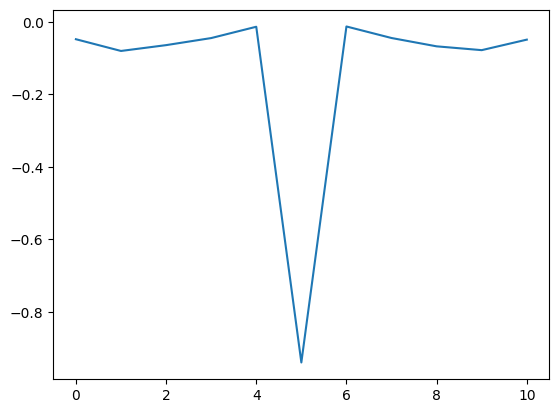

In [7]:
from analysis.musical import consonance_scores


expectation = generate_expectation(spike_tensors, consonance_scores())
snapshot = generate_snapshot(tensor, expectation, snap_size=11)
print(snapshot)
plt.plot(snapshot)

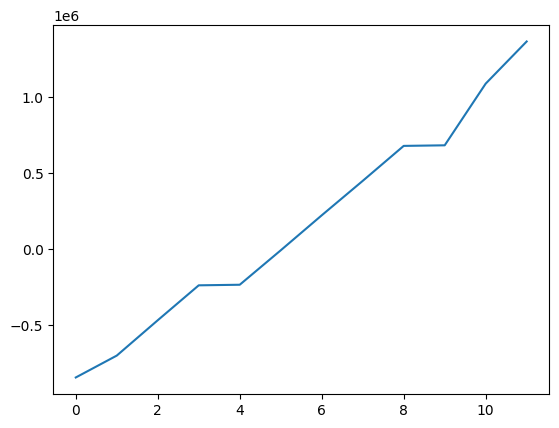

In [8]:
for tensor in spike_tensors:
    tension = - np.sum(tensor * expectation)
tension = [-np.sum(tensor * expectation) for tensor in spike_tensors]

import matplotlib.pyplot as plt
plt.plot(tension)

[0.020713171881986046, -0.010151413610553627, 0.006198107870096158, 0.02461551922521117, 0.055236038360141654, -0.8274542399083699, 0.05523870801043535, 0.02504170230358604, 0.0023852486057927757, -0.007480746061848377, 0.01985103920800041]


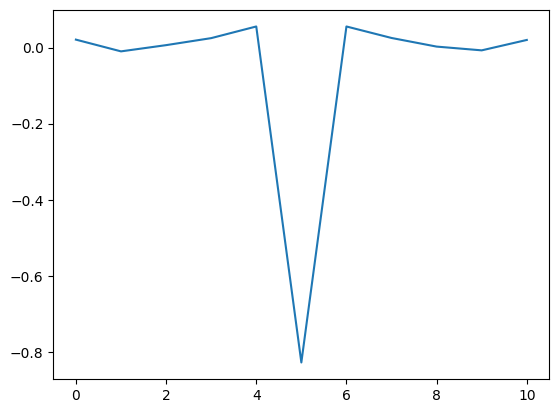

In [9]:
expectation = generate_expectation(spike_tensors, consonance_scores(adjust_to_zero=True))
snapshot = generate_snapshot(tensor, expectation, snap_size=11)
print(snapshot)
plt.plot(snapshot)